# Imports

In [243]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [244]:
import os

import torch
from torch_geometric.datasets import QM9

from botorch.fit import fit_gpytorch_mll
from botorch.models import SingleTaskGP
from botorch.test_functions.synthetic import Rosenbrock, Michalewicz
from gpytorch.mlls import ExactMarginalLogLikelihood

import matplotlib.pyplot as plt

from src.flory import FloryHuggins
from src.utils import uniform_simplex

# Gradient-based Optimization

## Objective

In [350]:
n_components = 3
objective = FloryHuggins(n_components, noise=0.05)
objective.set_pairwise(0, 1, 2.0)
objective.set_pairwise(1, 2, 5.0)
objective.set_cubic(2, 2.0)
objective.set_cubic(1, 0.25)

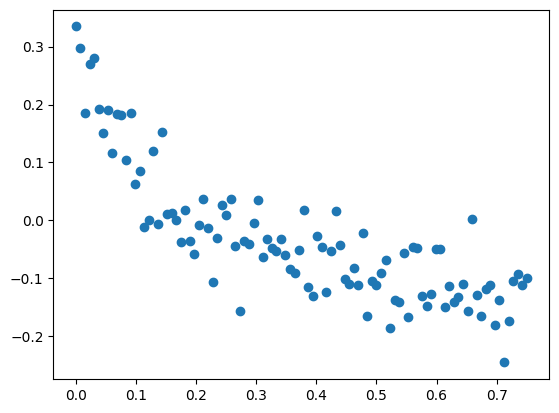

In [351]:
n = 100


x0_val = 0.25
x0 = torch.full((n,), x0_val)
x1 = torch.linspace(0.0, 1 - x0_val, n)
x2 = 1.0 - x0 - x1

x = torch.stack([x0, x1, x2], dim=1)
y = objective(x)

plt.scatter(x[:,1], y)
plt.show()

# Molecular Design


## Dataset

In [18]:
dataset = QM9(root="data")

In [12]:
dataset[0].num_node_features

11

In [53]:
dataset[-3].z

tensor([6, 7, 6, 6, 6, 6, 6, 6, 7, 1, 1, 1, 1, 1, 1, 1, 1])

In [54]:
dataset[0].edge_index

tensor([[0, 0, 0, 0, 1, 2, 3, 4],
        [1, 2, 3, 4, 0, 0, 0, 0]])